Likelihood ratio test using Poisson distributions

In [1]:
import csv
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = "data_and_materials/gamma-ray.csv"

In [3]:
# Create list gamma_data with time interval (secs) and number of gamma rays
with open(filename, newline='') as csvfile:
    file_reader = csv.reader(csvfile, delimiter=',')
    gamma_data = []
    first_row = True
    for i in file_reader:
        if first_row:
            first_row = False
            continue
        gamma_data.append([float(i[0]), int(round(float(i[1])))])

In [5]:
# Calculate the lambda coefficient for the mle null hypothesis
total_rays = 0
total_time = 0
for i in gamma_data:
    total_rays += i[1]
    total_time += i[0]
null_mle_lambda = total_rays/total_time

In [6]:
# Returns pdf for some interval length, number of rays, and coefficient
def possion_time_interval(interval, num_rays, mu):
    return stats.poisson.pmf(num_rays, mu * interval)

In [7]:
# Calculate the lambda coefficient for the mle alternative hypothesis
alternative_mle_lambdas = []
for i in gamma_data:
    alternative_mle_lambdas.append(i[1]/i[0])

In [8]:
# Calculate likelihood ratio
likelihood_ratio_top = 1
likelihood_ratio_bottom = 1
for i, e in enumerate(gamma_data):
    likelihood_ratio_top *= possion_time_interval(e[0], e[1], null_mle_lambda)
    likelihood_ratio_bottom *= possion_time_interval(e[0], e[1], alternative_mle_lambdas[i])
    
likelihood_ratio = likelihood_ratio_top / likelihood_ratio_bottom

In [9]:
print(likelihood_ratio)

2.1393380820958015e-23


In [10]:
# Compare to Chi squared distribution with 99 degrees of freedom
chi_sq = -2 * np.log(likelihood_ratio)
print(chi_sq)
p_val = 1 - stats.chi2.cdf(chi_sq, 99)
print(p_val)

104.39792133021314
0.33576662402509894


In [11]:
# Calculate the minimum value that would be "statistically significant
alpha_reg = round(stats.chi2.ppf(0.95, 99), 1)
print(alpha_reg)

123.2


In [13]:
x_colored = np.linspace(alpha_reg, 150, 10*(150 - alpha_reg) + 1)
y_colored = stats.chi2.pdf(x_colored, 99)

x_colored2 = np.linspace(chi_sq, 150, 10*(150 - chi_sq) + 1)
y_colored2 = stats.chi2.pdf(x_colored2, 99)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


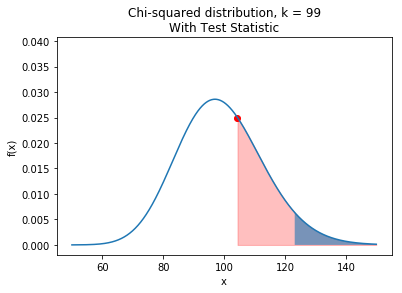

In [16]:
x = np.linspace(50, 150, 1001)
y = stats.chi2.pdf(x, 99)
plt.scatter(chi_sq, stats.chi2.pdf(chi_sq, 99), color = 'r')
plt.fill_between(x_colored2, y_colored2, 0, alpha=0.25, color = 'r')
plt.fill_between(x_colored, y_colored, 0, alpha=0.6)
plt.plot(x, y)
plt.title("Chi-squared distribution, k = 99\nWith Test Statistic")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.show()